# About Dataset
This dataset is about 12 features that can be related to heart failure occuration. <br>
Since the amount of the dataset's sample is just about 300(exactly 299), be careful to generalize your analysis. Also consider your country. I'm not sure about this dataset's background country.<br>

### features
These total 12 features can support your analysis.
* age(int)
* anaemia(bool): whether have anemia or not(빈혈증)
* creatinine_phosphokinase(int): Level of the CPK enzyme in the blood
* diabetes(bool)
* ejection_fraction(int): values for evaluation of cardiac function - indicates the pumping function
* high_blood_pressure(bool)
* platelets(int): platelets in the blood - important for bleeding
* serum_creatinine(float): level of serum creatinine in the blood - indicates the changes in the state of the kidney
* serum_sodium(int): level of serum sodium in the blood - indicates the amount of sodium water in the body
* sex(bool): 1 - male, 0 - female
* smoking(bool)
* time(int): observation period (days)
* *DEATH_EVENT*(target): number of patients deceased during observation period

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import pandas.DataFrame as df

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
# https://plotly.com/python/figure-factory-subplots/
# includes many wrapper functions that create unique chart types that are not yet included in plotly.js
# some Plotly features, such as subplotting, should be implemented slightly differently with these charts

### +) Plotly - three main modules
```
plotly.plotly
plotly.graph_ops
plotly.tools
```
1. plotly.plotly module <br>
The plotly.plotly module contains functions that require a response from Plotly's servers. Functions in this module are interface between your local machine and Plotly. <br>

2. plotly.graph_objs module <br>
The plotly.graph_objs module is the most important module that contains all of the class definitions for the objects that make up the plots you see. <br>
Following graph objects are defined − Figure, Data, Layout, different graph traces like scatter/Box/Histogram/etc.<br>
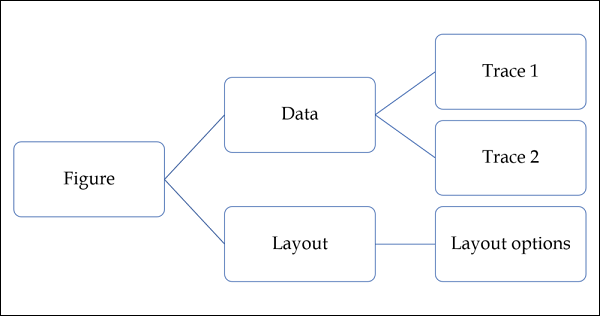!<br>

3. plotly.tools module<br>
The plotly.tools module contains many helpful functions facilitating and enhancing the Plotly experience. Functions for subplot generation, embedding Plotly plots in IPython notebooks, saving and retrieving your credentials are defined in this module.<br>

[Plotly - Package Structure](https://www.tutorialspoint.com/plotly/plotly_package_structure.htm)

# EDA & Visualization

In [ ]:
heart_df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
heart_df

In [ ]:
heart_df.dtypes

## 1. Relation of Sex&Age - Death Event

In [ ]:
hist_data = heart_df["age"].values
hist_data
#np.ndim(hist_data)
#np.shape(hist_data)
#np.maximum(hist_data)

In [ ]:
hist_data = [heart_df["age"].values]
# df.values: convert DF to ndarray(numpy array)
# how to convert DF to list, dictionary, ndarray: https://ek-koh.github.io/data%20analysis/df-transform/
group_labels = ['age']

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

* Age ranges from 40 to 95
* Since the number of samples is small, the figures are not even

0 is female, 1 is male <br>
female

In [ ]:
fig = px.box(heart_df, x='sex', y='age', points='all')
fig.update_layout(title_text='Gender wise Age Spread - Male: 1, Female: 0')
fig.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

male = heart_df[heart_df["sex"]==1]
female = heart_df[heart_df["sex"]==0]

male_surv = male[heart_df["DEATH_EVENT"]==0]
male_decr = male[heart_df["DEATH_EVENT"]==1]
female_surv = female[heart_df["DEATH_EVENT"]==0]
female_decr = female[heart_df["DEATH_EVENT"]==1]

labels = ['Male - survived','Female - survived','Male - decreased', 'Female - decreased']
values = [len(male_surv),len(male_decr),len(female_surv),len(male_decr)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - Gender")
fig.show()

In [ ]:
surv = heart_df[heart_df["DEATH_EVENT"]==0]["age"]
decr = heart_df[heart_df["DEATH_EVENT"]==1]["age"]
hist_data = [surv, decr]
group_labels = ['survived','decreased']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)

fig.update_layout(title_text="Analysis in Age on Survival Status")
fig.show()

In [ ]:
fig = px.violin(heart_df, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=heart_df.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

* 45~70 show high survival rate

## 2. Relation of Smoking&Age - Death Event

In [ ]:
fig = px.violin(heart_df, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=heart_df.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status")
fig.show()

In [ ]:
sm = heart_df[heart_df["DEATH_EVENT"]==1]["smoking"]
nosm = heart_df[heart_df["DEATH_EVENT"]==0]["smoking"]

print(np.shape(sm),np.shape(nosm))

## 3. Relation of Diabetes&Age - Death Event

In [ ]:
fig = px.violin(heart_df, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=heart_df.columns)
fig.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")
fig.show()